In [24]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

/Users/kate/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_full = df_train.append(df_test, ignore_index = True)
print(type(df))
print(df_train.shape)
print(df_test.shape)
print(df_full.shape)
# print(data.sample(3))

<class 'pandas.core.frame.DataFrame'>
(891, 12)
(418, 11)
(1309, 12)


In [26]:
titanic = df_full[:891]
titanic.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

In [23]:
titanic.describe()

/Users/kate/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Age        Fare       Parch  PassengerId      Pclass  \
count  714.000000  891.000000  891.000000   891.000000  891.000000   
mean    29.699118   32.204208    0.381594   446.000000    2.308642   
std     14.526497   49.693429    0.806057   257.353842    0.836071   
min      0.420000    0.000000    0.000000     1.000000    1.000000   
25%           NaN    7.910400    0.000000   223.500000    2.000000   
50%           NaN   14.454200    0.000000   446.000000    3.000000   
75%           NaN   31.000000    0.000000   668.500000    3.000000   
max     80.000000  512.329200    6.000000   891.000000    3.000000   

            SibSp    Survived  
count  891.000000  891.000000  
mean     0.523008    0.383838  
std      1.102743    0.486592  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      8.000000    1.000000

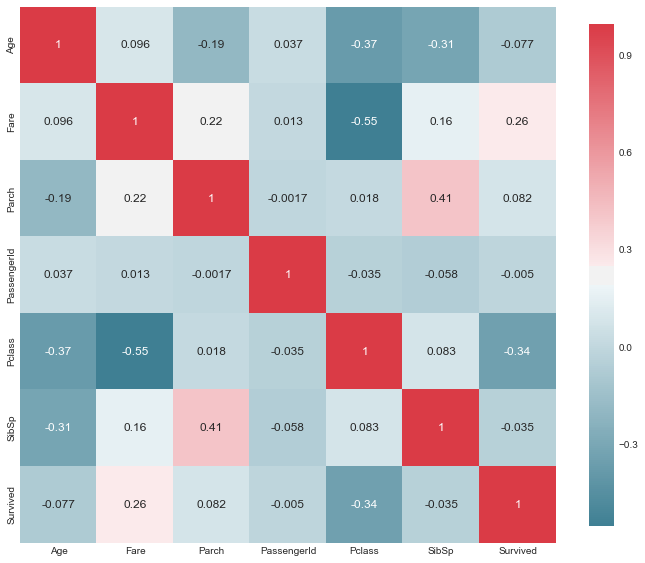

In [28]:
def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map(titanic)

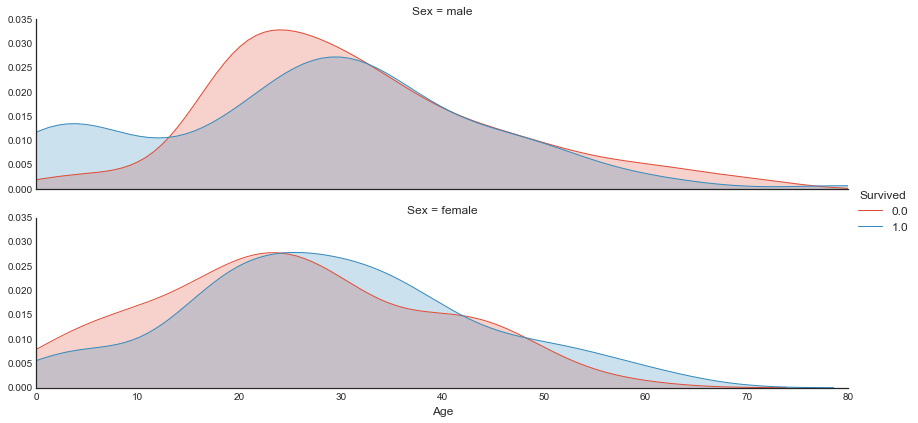

In [29]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

plot_distribution( titanic, var = 'Age', target = 'Survived', row = 'Sex' )

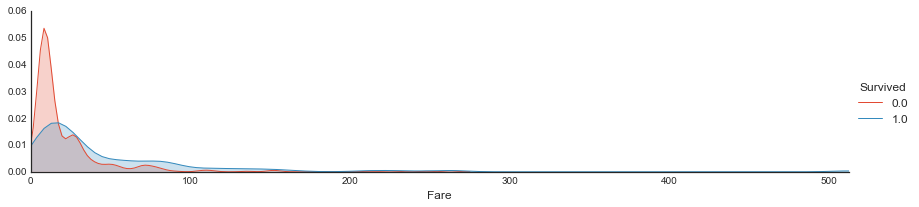

In [31]:
plot_distribution(titanic, var = 'Fare', target = 'Survived')

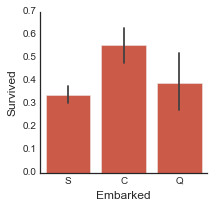

In [33]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
plot_categories( titanic , cat = 'Embarked' , target = 'Survived' )

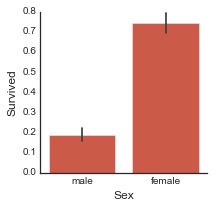

In [34]:
plot_categories( titanic , cat = 'Sex' , target = 'Survived' )

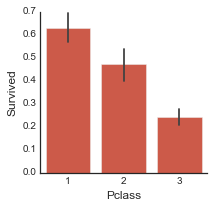

In [36]:
plot_categories( titanic , cat = 'Pclass' , target = 'Survived' )

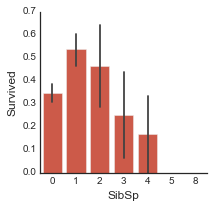

In [37]:
plot_categories( titanic , cat = 'SibSp' , target = 'Survived' )

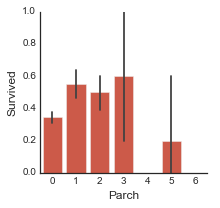

In [38]:
plot_categories( titanic , cat = 'Parch' , target = 'Survived' )

In [40]:
sex = pd.Series( np.where(df_full.Sex == 'male' , 1 , 0 ) , name = 'Sex')
embarked = pd.get_dummies(df_full.Embarked , prefix='Embarked' )
embarked.head()

Embarked_C  Embarked_Q  Embarked_S
0         0.0         0.0         1.0
1         1.0         0.0         0.0
2         0.0         0.0         1.0
3         0.0         0.0         1.0
4         0.0         0.0         1.0

In [41]:
pclass = pd.get_dummies(df_full.Pclass , prefix='Pclass' )
pclass.head()

Pclass_1  Pclass_2  Pclass_3
0       0.0       0.0       1.0
1       1.0       0.0       0.0
2       0.0       0.0       1.0
3       1.0       0.0       0.0
4       0.0       0.0       1.0

In [44]:
imputed = pd.DataFrame()
imputed[ 'Age' ] = df_full.Age.fillna(df_full.Age.mean())
imputed[ 'Fare' ] = df_full.Fare.fillna(df_full.Fare.mean())
imputed.head()

Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

In [46]:
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = df_full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head()

Master  Miss   Mr  Mrs  Officer  Royalty
0     0.0   0.0  1.0  0.0      0.0      0.0
1     0.0   0.0  0.0  1.0      0.0      0.0
2     0.0   1.0  0.0  0.0      0.0      0.0
3     0.0   0.0  0.0  1.0      0.0      0.0
4     0.0   0.0  1.0  0.0      0.0      0.0

In [47]:
cabin = pd.DataFrame()

# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = df_full.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )

# dummy encoding ...
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )

cabin.head()

Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   Cabin_U  
0      1.0  
1      0.0  
2      1.0  
3      0.0  
4      1.0

In [49]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

# Extracting dummy variables from tickets:
ticket[ 'Ticket' ] = df_full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.shape
ticket.head()

Ticket_A  Ticket_A4  Ticket_A5  Ticket_AQ3  Ticket_AQ4  Ticket_AS  \
0       0.0        0.0        1.0         0.0         0.0        0.0   
1       0.0        0.0        0.0         0.0         0.0        0.0   
2       0.0        0.0        0.0         0.0         0.0        0.0   
3       0.0        0.0        0.0         0.0         0.0        0.0   
4       0.0        0.0        0.0         0.0         0.0        0.0   

   Ticket_C  Ticket_CA  Ticket_CASOTON  Ticket_FC     ...      Ticket_SOTONO2  \
0       0.0        0.0             0.0        0.0     ...                 0.0   
1       0.0        0.0             0.0        0.0     ...                 0.0   
2       0.0        0.0             0.0        0.0     ...                 0.0   
3       0.0        0.0             0.0        0.0     ...                 0.0   
4       0.0        0.0             0.0        0.0     ...                 0.0   

   Ticket_SOTONOQ  Ticket_SP  Ticket_STONO  Ticket_STONO2  Ticket_STONOQ  \
0             0.0        0.0           0.0            0.0            0.0   
1             0.0        0.0           0.0            0.0            0.0   
2             0.0        0.0           0.0            1.0            0.0   
3             0.0        0.0           0.0            0.0            0.0   
4             0.0        0.0           0.0            0.0            0.0   

   Ticket_SWPP  Ticket_WC  Ticket_WEP  Ticket_XXX  
0          0.0        0.0         0.0         0.0  
1          0.0        0.0         0.0         0.0  
2          0.0        0.0         0.0         0.0  
3          0.0        0.0         0.0         1.0  
4          0.0        0.0         0.0         1.0  

[5 rows x 37 columns]

In [51]:
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = df_full[ 'Parch' ] + df_full[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

FamilySize  Family_Single  Family_Small  Family_Large
0           2              0             1             0
1           2              0             1             0
2           1              1             0             0
3           2              0             1             0
4           1              1             0             0

In [83]:
full_X = pd.concat( [ imputed , embarked , sex ] , axis=1 )
#full_X = full_X.drop(['Ticket', 'Cabin'], axis=1)
full_X.head()

Age     Fare  Embarked_C  Embarked_Q  Embarked_S  Sex
0  22.0   7.2500         0.0         0.0         1.0    1
1  38.0  71.2833         1.0         0.0         0.0    0
2  26.0   7.9250         0.0         0.0         1.0    0
3  35.0  53.1000         0.0         0.0         1.0    0
4  35.0   8.0500         0.0         0.0         1.0    1

In [84]:
# Create all datasets that are necessary to train, validate and test models
train_valid_X = full_X[ 0:891 ]
train_valid_y = titanic.Survived
test_X = full_X[ 891: ]
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

print (full_X.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 6) (623, 6) (268, 6) (623,) (268,) (418, 6)


0.985553772071


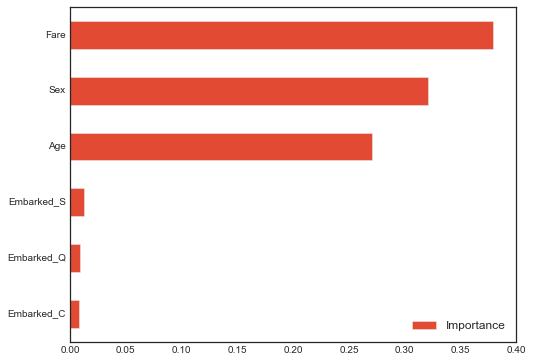

In [85]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    

plot_variable_importance(train_X, train_y)

In [86]:
def fit_model(model):
    model.fit( train_X , train_y )
    print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

In [91]:
fit_model(RandomForestClassifier(n_estimators=100))
fit_model(SVC())
fit_model(GradientBoostingClassifier())
fit_model(KNeighborsClassifier(n_neighbors = 3))
fit_model(GaussianNB())
fit_model(LogisticRegression())

0.985553772071 0.805970149254
0.906902086677 0.679104477612
0.903691813804 0.798507462687
0.823434991974 0.716417910448
0.786516853933 0.772388059701
0.786516853933 0.768656716418


In [88]:
model = RandomForestClassifier(n_estimators=100)
model.fit( train_X , train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [92]:
test_Y = model.predict( test_X )
passenger_id = df_full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )
test.shape
test.head()

PassengerId  Survived
891          892       0.0
892          893       0.0
893          894       0.0
894          895       1.0
895          896       1.0

In [93]:
test['Survived'] = [int(x) for x in test['Survived']]
test.to_csv( 'titanic_pred.csv' , index = False )

## Other method 

In [124]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(df_train)
data_test = transform_features(df_test)
data_train.head()

PassengerId  Survived  Pclass     Sex          Age  SibSp  Parch  \
0            1         0       3    male      Student      1      0   
1            2         1       1  female        Adult      1      0   
2            3         1       3  female  Young Adult      0      0   
3            4         1       1  female  Young Adult      1      0   
4            5         0       3    male  Young Adult      0      0   

         Fare Cabin       Lname NamePrefix  
0  1_quartile     N     Braund,        Mr.  
1  4_quartile     C    Cumings,       Mrs.  
2  1_quartile     N  Heikkinen,      Miss.  
3  4_quartile     C   Futrelle,       Mrs.  
4  2_quartile     N      Allen,        Mr.

In [126]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()



from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [128]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.7666666666666667
Fold 2 accuracy: 0.8539325842696629
Fold 3 accuracy: 0.7865168539325843
Fold 4 accuracy: 0.8426966292134831
Fold 5 accuracy: 0.7865168539325843
Fold 6 accuracy: 0.8089887640449438
Fold 7 accuracy: 0.7640449438202247
Fold 8 accuracy: 0.8202247191011236
Fold 9 accuracy: 0.8539325842696629
Fold 10 accuracy: 0.8202247191011236
Mean Accuracy: 0.8103745318352061


In [130]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1